In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import statsmodels.api as sm
%matplotlib inline

#### I know my functions are not working, I couldn't figure out what was wrong. And I did not want to leave anything blank, so I decided to keep going and hopefully, I will figure it out before I submit this. If not, I apologize, I did try my best to figure it out.

In [2]:
from .. import project_functions
df = project_functions.load_and_process('/users/annabelle/School/2021/Summer2/data301/group25-project/project-group25-project/data/raw/world-happiness-report-2021.csv')
df

ImportError: attempted relative import with no known parent package

In [3]:
df_clean = (pd.read_csv('/users/annabelle/School/2021/Summer2/data301/group25-project/project-group25-project/data/raw/world-happiness-report-2021.csv')
       .rename(columns = {'Ladder score':"Happiness score"})
       .assign(year='2021')
       .drop(['Logged GDP per capita', 
                              'Social support',
                              'Healthy life expectancy',
                              'Freedom to make life choices',
                              'Generosity',
                              'Perceptions of corruption',
                              'Ladder score in Dystopia',
                              'upperwhisker',
                              'lowerwhisker',
                              'Standard error of ladder score',
                              'Regional indicator',
                              'Dystopia + residual'],axis='columns')
       .rename(columns = {'Standard error of ladder score':"Standard error of happiness score", 
                          'Explained by: Log GDP per capita':"Log GDP per capita", 
                          'Explained by: Social support':"Social support", 
                          'Explained by: Healthy life expectancy':"Healthy life expectancy",
                          'Explained by: Freedom to make life choices':"Freedom to make life choices",
                          'Explained by: Generosity':"Generosity",
                          'Explained by: Perceptions of corruption':"Perceptions of corruption"}))
        
df_clean.head()

,Country name,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,Finland,7.842,1.446,1.106,0.741,0.691,0.124,0.481,2021
1,Denmark,7.620,1.502,1.108,0.763,0.686,0.208,0.485,2021
2,Switzerland,7.571,1.566,1.079,0.816,0.653,0.204,0.413,2021
3,Iceland,7.554,1.482,1.172,0.772,0.698,0.293,0.170,2021
4,Netherlands,7.464,1.501,1.079,0.753,0.647,0.302,0.384,2021


In [4]:
from .. import project_functions
df1 = project_functions.load_and_process('/users/annabelle/School/2021/Summer2/data301/group25-project/project-group25-project/data/raw/world-happiness-report.csv')
df1

ImportError: attempted relative import with no known parent package

In [5]:
df2 = (pd.read_csv('/users/annabelle/School/2021/Summer2/data301/group25-project/project-group25-project/data/raw/world-happiness-report.csv')
       .rename(columns = {'Life Ladder':"Happiness score",'Healthy life expectancy at birth':"Healthy life expectancy"})
       .drop(['Positive affect','Negative affect'],axis='columns')
       .loc[lambda x: x['year']>2018]
      )
df2

,Country name,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
11,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924
23,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914
24,Albania,2020,5.365,9.497,0.710,69.3,0.754,0.007,0.891
32,Algeria,2019,4.745,9.337,0.803,66.1,0.385,0.005,0.741
50,Argentina,2019,6.086,10.000,0.896,69.0,0.817,-0.211,0.830
...,...,...,...,...,...,...,...,...,...
1919,Yemen,2019,4.197,NaN,0.870,57.5,0.651,NaN,0.798
1932,Zambia,2019,3.307,8.155,0.638,55.8,0.811,0.077,0.832
1933,Zambia,2020,4.838,8.117,0.767,56.3,0.750,0.056,0.810
1947,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831


In [6]:
df2.dropna(subset=['Log GDP per capita'], inplace=True)

In [7]:
df2.fillna(method ='pad')

,Country name,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
11,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924
23,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914
24,Albania,2020,5.365,9.497,0.710,69.3,0.754,0.007,0.891
32,Algeria,2019,4.745,9.337,0.803,66.1,0.385,0.005,0.741
50,Argentina,2019,6.086,10.000,0.896,69.0,0.817,-0.211,0.830
...,...,...,...,...,...,...,...,...,...
1907,Vietnam,2019,5.467,8.992,0.848,68.1,0.952,-0.126,0.788
1932,Zambia,2019,3.307,8.155,0.638,55.8,0.811,0.077,0.832
1933,Zambia,2020,4.838,8.117,0.767,56.3,0.750,0.056,0.810
1947,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831


In [8]:
df2 = df2.reset_index(drop=True)
df2

,Country name,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924
1,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914
2,Albania,2020,5.365,9.497,0.710,69.3,0.754,0.007,0.891
3,Algeria,2019,4.745,9.337,0.803,66.1,0.385,0.005,0.741
4,Argentina,2019,6.086,10.000,0.896,69.0,0.817,-0.211,0.830
...,...,...,...,...,...,...,...,...,...
221,Vietnam,2019,5.467,8.992,0.848,68.1,0.952,-0.126,0.788
222,Zambia,2019,3.307,8.155,0.638,55.8,0.811,0.077,0.832
223,Zambia,2020,4.838,8.117,0.767,56.3,0.750,0.056,0.810
224,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831


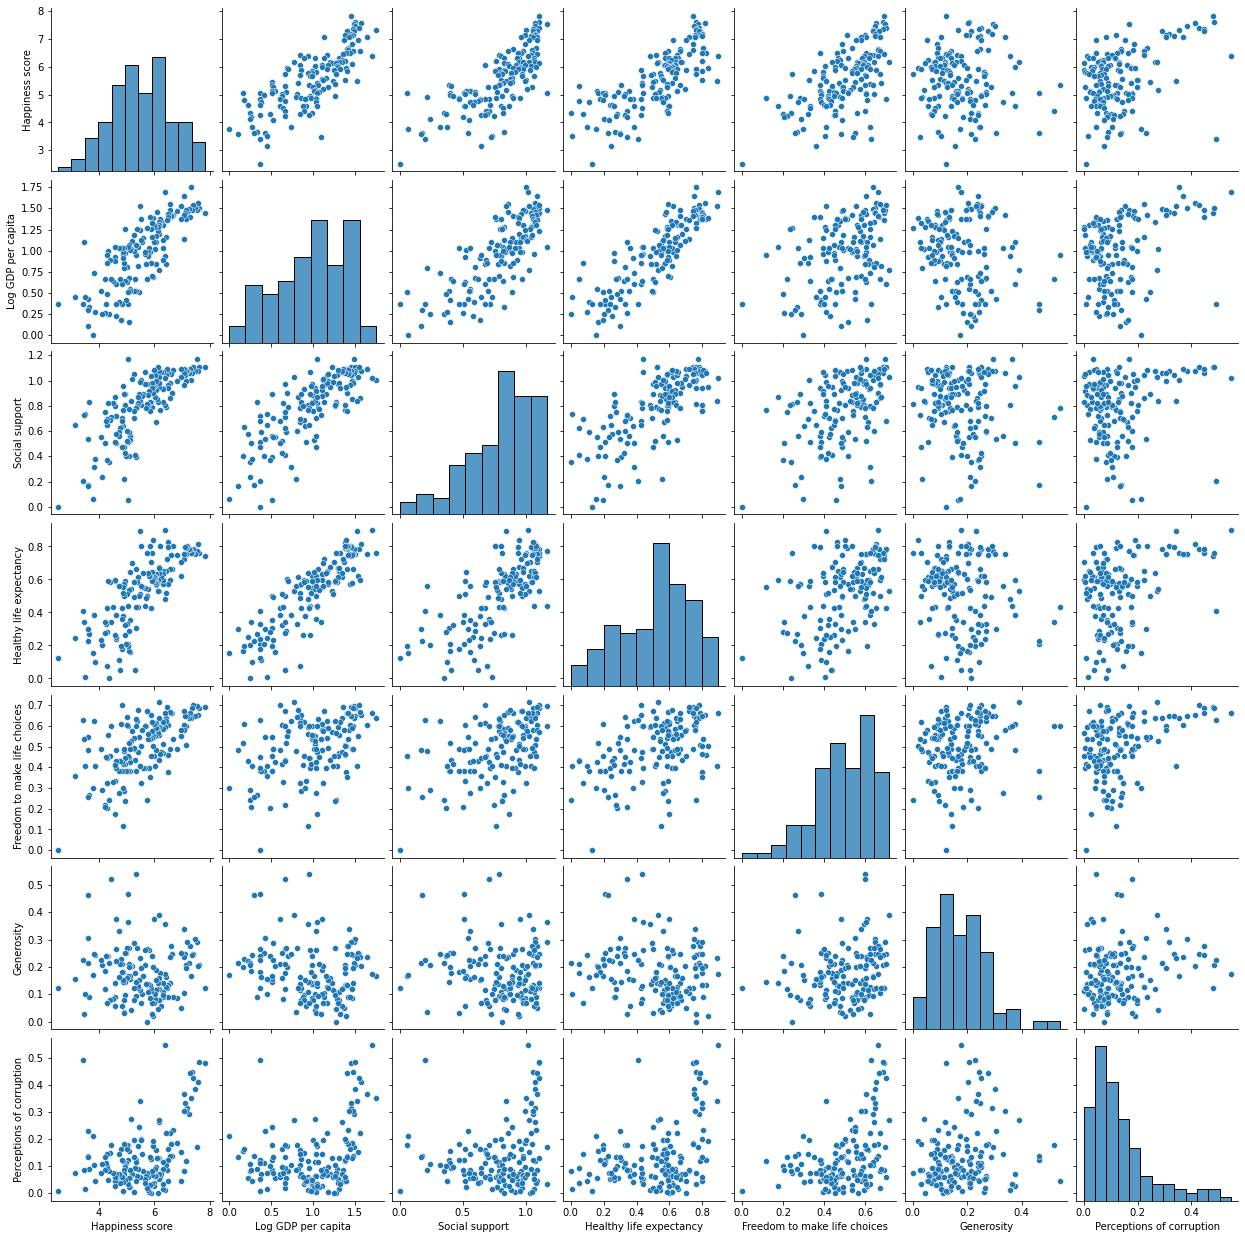

In [9]:
sns.pairplot(df_clean)

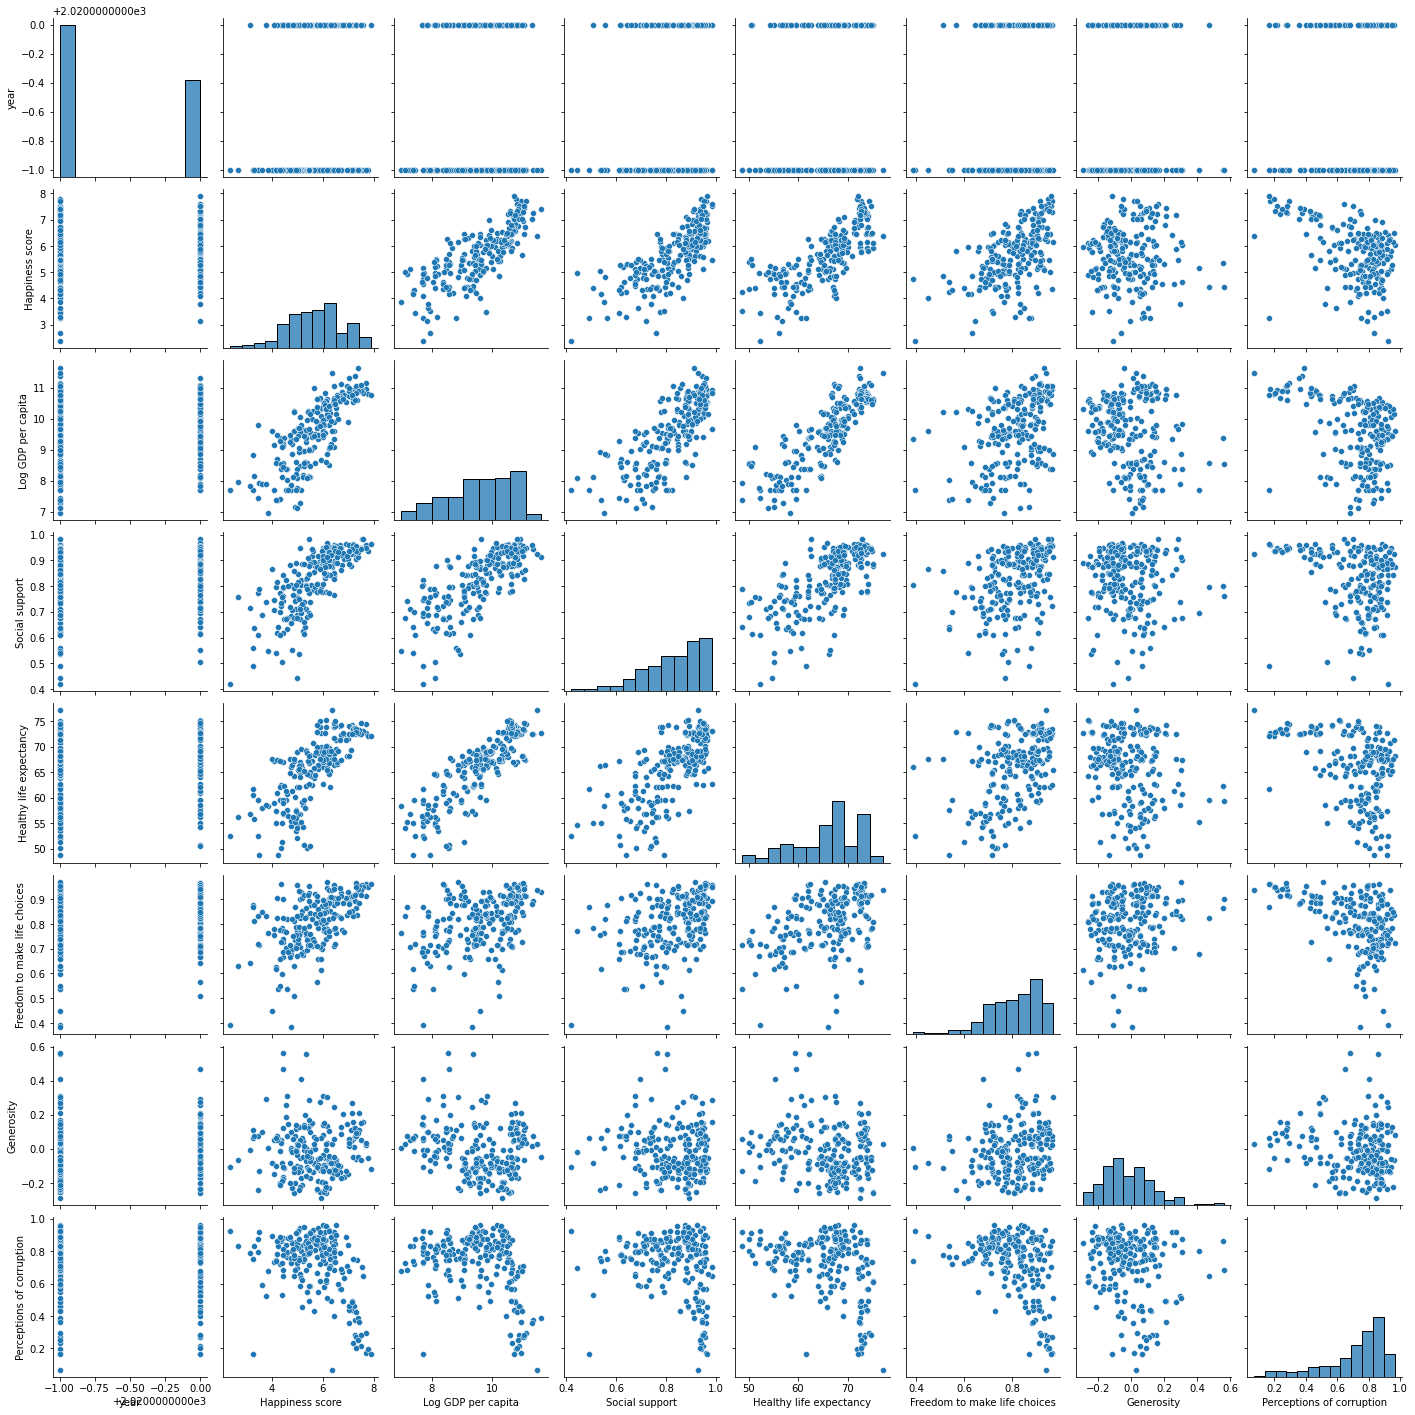

In [10]:
sns.pairplot(df2)

In [39]:
df_clean['Happiness score Mean'] = df_clean["Happiness score"].mean()
df_clean_HSM = df_clean.drop(columns = ['Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Log GDP per capita'])
df_clean_HSM.mean()
df_clean_HSM.sort_values(by = ['Happiness score Mean'], ascending = False)
df_clean_HSM['Happiness score diff'] = df_clean_HSM['Happiness score'] - df_clean_HSM['Happiness score Mean']
df_clean_HSM

,Country name,Happiness score,year,Happiness score Mean,Happiness score diff
0,Finland,7.842,2021,5.532839,2.309161
1,Denmark,7.620,2021,5.532839,2.087161
2,Switzerland,7.571,2021,5.532839,2.038161
3,Iceland,7.554,2021,5.532839,2.021161
4,Netherlands,7.464,2021,5.532839,1.931161
...,...,...,...,...,...
144,Lesotho,3.512,2021,5.532839,-2.020839
145,Botswana,3.467,2021,5.532839,-2.065839
146,Rwanda,3.415,2021,5.532839,-2.117839
147,Zimbabwe,3.145,2021,5.532839,-2.387839


In [36]:
df2['Happiness score Mean'] = df2["Happiness score"].mean()
df2_HSM = df2.drop(columns = ['Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Log GDP per capita'])
df2_HSM.mean()
df2_HSM.sort_values(by = ['Happiness score Mean'], ascending = False)
df2_HSM['Happiness score diff'] = df2_HSM['Happiness score'] - df2_HSM['Happiness score Mean']
df2_HSM=df2_HSM.sort_values(by = ['Happiness score diff'], ascending = False)
df2_HSM = df2_HSM.reset_index()
df2_HSM.drop(columns = ['index'], inplace=True)
df2_HSM


,Country name,year,Happiness score,Happiness score Mean,Happiness score diff
0,Finland,2020,7.889,5.690686,2.198314
1,Finland,2019,7.780,5.690686,2.089314
2,Switzerland,2019,7.694,5.690686,2.003314
3,Denmark,2019,7.693,5.690686,2.002314
4,Iceland,2020,7.575,5.690686,1.884314
...,...,...,...,...,...
221,Rwanda,2019,3.268,5.690686,-2.422686
222,India,2019,3.249,5.690686,-2.441686
223,Zimbabwe,2020,3.160,5.690686,-2.530686
224,Zimbabwe,2019,2.694,5.690686,-2.996686


In [42]:
frames = [df_clean_HSM, df2_HSM]
  
result = pd.concat(frames)
result =result.sort_values(by = ['Happiness score diff'], ascending = False)
result = result.reset_index()
result.drop(columns = ['index'], inplace=True)
result

,Country name,Happiness score,year,Happiness score Mean,Happiness score diff
0,Finland,7.842,2021,5.532839,2.309161
1,Finland,7.889,2020,5.690686,2.198314
2,Finland,7.780,2019,5.690686,2.089314
3,Denmark,7.620,2021,5.532839,2.087161
4,Switzerland,7.571,2021,5.532839,2.038161
...,...,...,...,...,...
370,India,3.249,2019,5.690686,-2.441686
371,Zimbabwe,3.160,2020,5.690686,-2.530686
372,Zimbabwe,2.694,2019,5.690686,-2.996686
373,Afghanistan,2.523,2021,5.532839,-3.009839
